***
# BootCamp em Ciência de Dados 2 - Alura

***
## Módulo 1 
Analisando dados da saúde com Python e Pandas
- Aprenda como utilizar Python e Pandas para analisar dados reais.
- Aprenda como ler dados reais com Pandas e os desafios de lidar com dados governamentais.
- Analise e explore os dados criando hipótese de forma analítica.
- Crie visualizações e aprenda boas práticas.

***
### Aula 2 - Primeiras visualizações de dados
Será utilizaada uma nova base do DATASUS TabNet agora com data de Internação ao invés da data de processamento da aula1

***
### Análise de gastos hospitalares por mês/ano de INTERNAÇÃO e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [1]:
import pandas as pd

#### Importando base de dados do SUS utilizando pandas

In [2]:
dados_sus = pd.read_csv('C:/Users/mago7/Documents/Cência de Dados/Curso_Alura/BootCamp/Módulo1/datasus_internacao.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

#### Nova tabela importada com linhas de UF com gastos em R$ e nas colunas mês/ano a partir de 1992

In [3]:
dados_sus.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [4]:
dados_sus.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,84404640.00,37798832.80,1.276439e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,2.363994e+07,2.260835e+07,2.151915e+07,2.182500e+07,2.141867e+07,2.138701e+07,1.602779e+07,11428462.42,4035989.77,2.324525e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,2.068157e+07,2.093614e+07,2.017620e+07,2.038794e+07,1.831662e+07,1.885285e+07,1.589053e+07,13207979.82,8835890.09,2.180120e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,4.587133e+07,4.756816e+07,4.795133e+07,4.530484e+07,3.978541e+07,3.761425e+07,3.565589e+07,32253788.65,24867001.02,4.973572e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,2.642848e+07,2.387530e+07,2.177187e+07,2.308759e+07,2.066853e+07,2.255203e+07,2.257387e+07,19004029.87,14731938.43,2.592423e+09


In [5]:
dados_sus.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Dez    5.377291e+07
2021/Jan    4.947411e+07
2021/Fev    3.899242e+07
2021/Mar    2.416371e+07
Total       6.388206e+09
Length: 165, dtype: float64

#### Abaixo informação da tabela com identificação de 165 colunas tipo float (valores numéricos decimais) e 123 tipo Object (não numéricos). Na sequencia comando para identificar as colunas object.

In [6]:
dados_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


In [7]:
dados_sus.select_dtypes(include=object)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,604.33,-,-,-,-,-
1,12 Acre,-,-,-,-,-,-,-,-,-,...,-,-,-,184.65,-,-,-,-,1099.17,-
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,-,-,-,1134.83,951.89,-,531.94,-,-,212.75
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,413.69,-
4,15 Pará,-,-,-,-,-,-,-,-,-,...,-,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1647.39,7754.72,12695.61
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,-,-,1122.46,-,578.69,-,-,-,34446.08,586.69
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,-,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,-,-,-,-,162.01,-,-,428.77,-,12172.72
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,-,-,-,149.65,3186.33,-,-,-,-,3698.69


#### Função format para ajuste de notação científica para valores decimais

In [8]:
pd.options.display.float_format='{:.2f}'.format

In [9]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Avaliando o mês de agosto de 2008

In [10]:
dados_sus['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42500830.29
19   180005050.15
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21054991.27
26    11548451.89
Name: 2008/Ago, dtype: float64

In [11]:
dados_sus['2008/Ago'].mean()

26641365.101481482

#### Visualizações preliminares
Geração, testes e ajustes de gráficos para o mês agosto de 2008 com plot, pyplot e ticker

<AxesSubplot:xlabel='Unidade da Federação'>

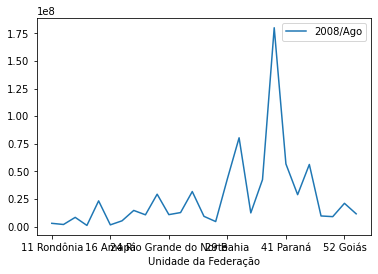

In [12]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

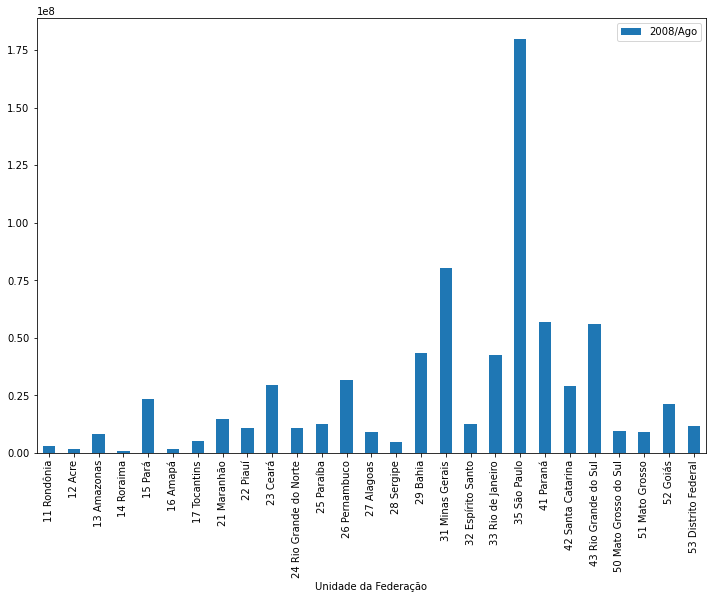

In [13]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))

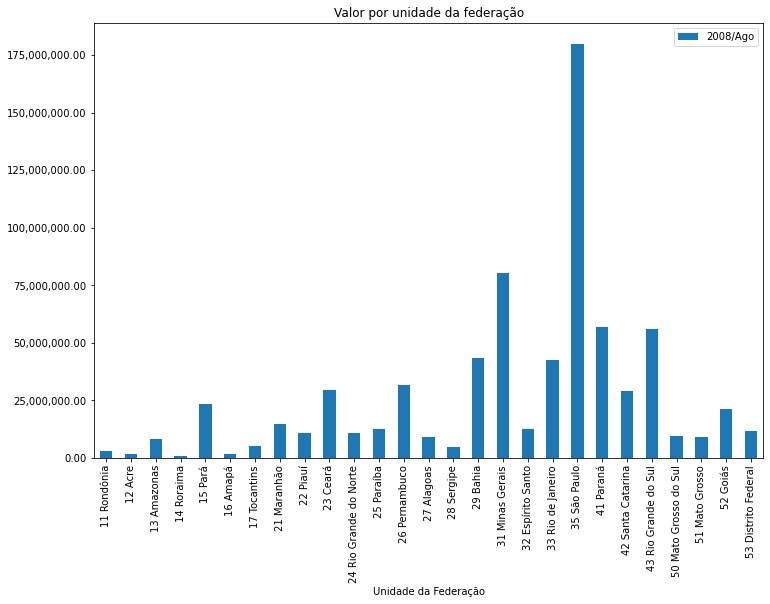

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

### Gráfico ajustado abaixo.

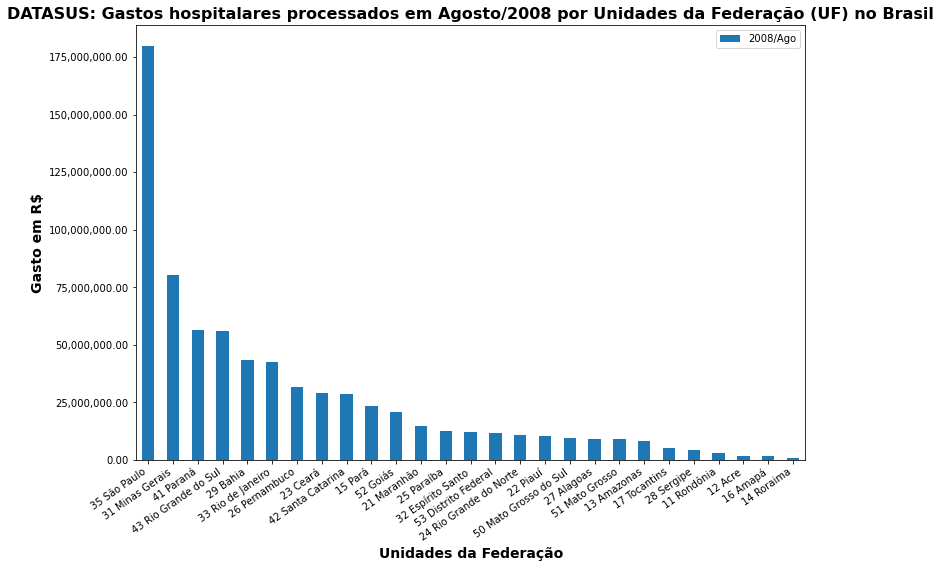

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_sus.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Agosto/2008 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Foram ajustados nomes e negrito do título e rótulo dos eixos, além da posição do rótulo do eixo x e ordem decrescente de gastos por UF

### Outro gráfico para o mês mais recente do dataframe

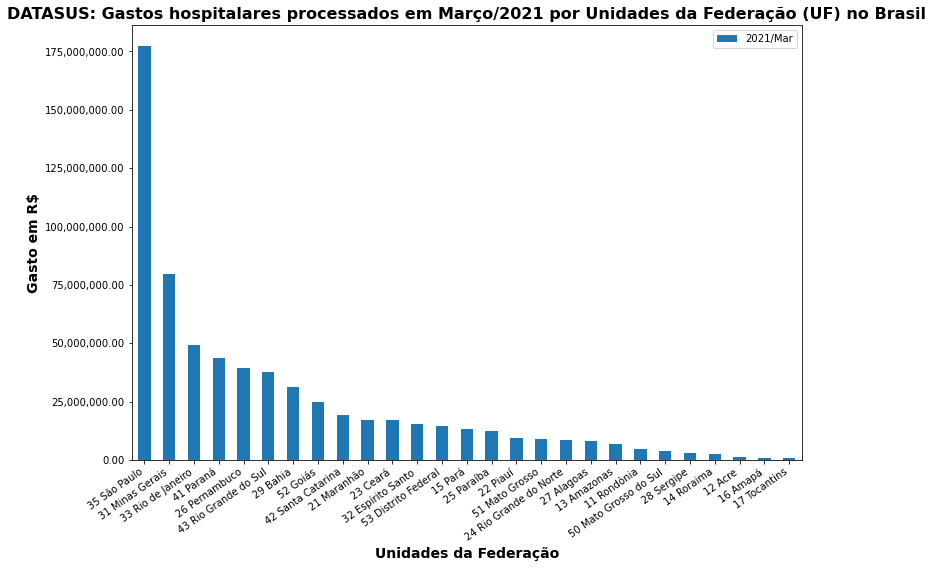

In [76]:
ax = dados_sus.sort_values(by='2021/Mar', ascending=False).plot(x='Unidade da Federação', y='2021/Mar', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Março/2021 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Para melhorias: 1) pode-se tirar os IDs das UFs; 2) colocar o label do eixo y já em milhões, evitando número muito grande; 3) ajustar as casas decimais da média datasus ago/2008

***
#### Para selecionar duas colunas no novo dataframe

In [17]:
dados_sus[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


#### Usando o mean novamente para verificar as colunas com float
veja que valores float válidos começa em jan/2007 indicando as colunas válidas com preenchimento completo e o dataframe começa em 1992 com vários preenchimentos vazios

In [26]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Determinando o índice e fazendo um slice no dataframe para colunas válidas

In [46]:
colunas_validas=dados_sus.mean().index
colunas_validas

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [47]:
dados_sus[colunas_validas]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


#### Inserindo a coluna Unidades da Federação dentro do DF de Colunas válidas

In [48]:
colunas_validas = dados_sus.mean().index.tolist()   #transformando o índice em lista para poder manipular
colunas_validas.insert(0, "Unidade da Federação") # 0 é a posição onde entra a coluna unidade da federação do DataFrame original
colunas_validas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [64]:
validas = dados_sus[colunas_validas]
validas.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


Aqui ficou demonstrado a inserção e que o índice do DF são os números 0 1 2 ... (no lado esquerdo dos estados) ao invés de Unidades da Federação.
***
Assim, pode-se setar o índice devido conforme abaixo:

In [65]:
validas = validas.set_index("Unidade da Federação")
validas

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74


In [66]:
validas['2020/Ago'].head()   # resultado da coluna selecionada por UF

Unidade da Federação
11 Rondônia   11433467.56
12 Acre        3658265.59
13 Amazonas   18687233.58
14 Roraima     3262354.34
15 Pará       38793393.54
Name: 2020/Ago, dtype: float64

In [67]:
validas.loc["12 Acre"]   # Resultado da linha selecionada e os valores por data

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

***
#### Visualização gráfica

<AxesSubplot:xlabel='Unidade da Federação'>

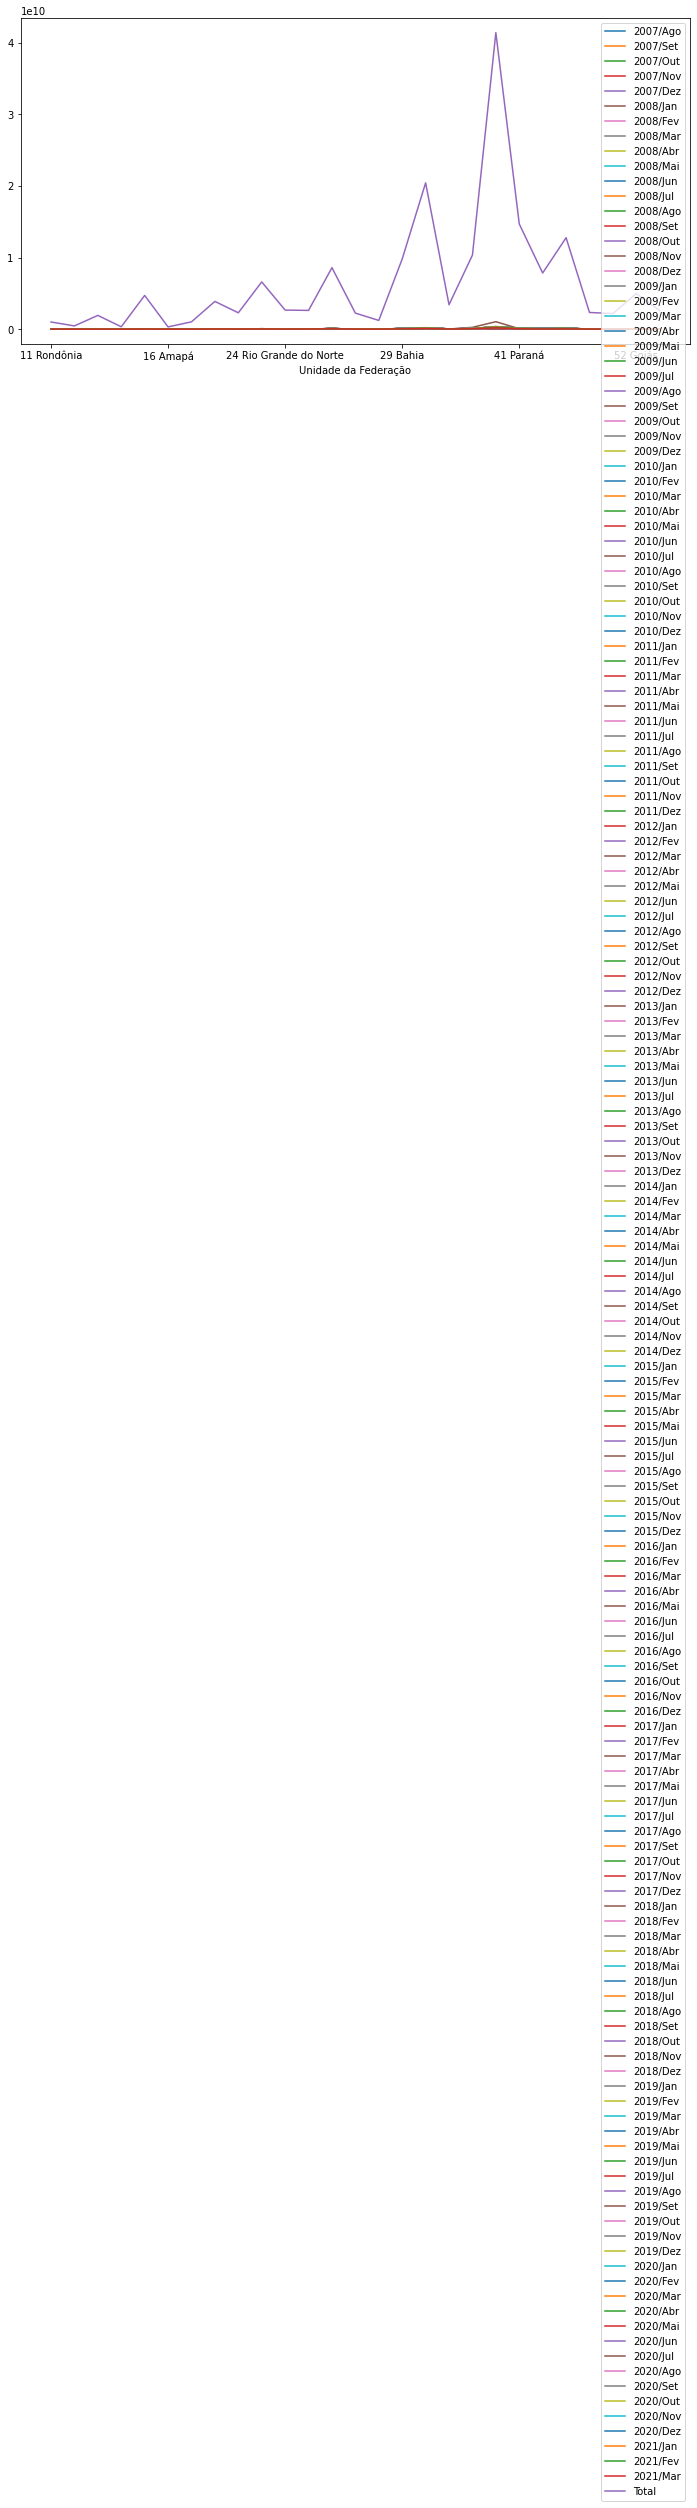

In [68]:
validas.plot(figsize=(12,6))    # Aqui o gráfico fica linhas x datas o que é errado pois deseja-se por UF

#### Aqui vamos transpor o índice, transformando UF para ocupar o DF como colunas e então poder imprimir o gráfico corretamente:

In [69]:
validas.T.head()   # Função T para transpor o índice para as colunas e poder imprimir o gráfico corretamente

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<AxesSubplot:>

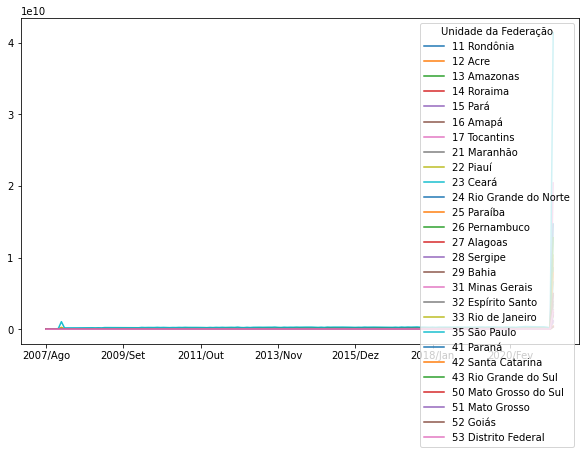

In [70]:
validas.T.plot(figsize=(10,6))

#### O gráfico ficou coorreto por UF, porém o último valor (por trás da legenda) mostra um resultado grande no final 

In [71]:
validas.T.tail()    # Investigando o final do DF de validas transposto revela a coluna 'Total' distorcendo o gráfico

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,...,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


#### Retirando a coluna Total da base validas, verificando e grando novamente o gráfico:

In [72]:
validas = validas.drop("Total", axis=1)    ## A função drop retira a linha Total e o axis=1 indica que o total está como Linha (axis=0 indicaria como coluna, se fosse o caso) 
validas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


In [73]:
validas.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Nov,8759013.71,3393958.27,20451573.77,3527263.23,37043032.10,2714710.93,509009.74,32446802.41,20021998.76,54026288.42,...,35708727.33,82807309.85,324599773.40,133443307.36,79448753.69,116738266.69,21418665.16,18316623.02,39785408.90,20668526.36
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43


<AxesSubplot:>

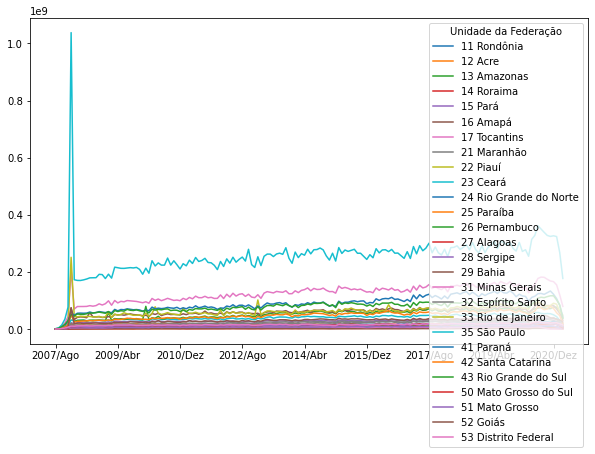

In [74]:
validas.T.plot(figsize=(10,6))

O gráfico ficou ajustado e já indica algo a investigar, posteriormente, nas linhas que sobem muito logo no início do plot dos dados por UF e a legenda mal posicionada (desafio)

***
## DESAFIOS 
MÓDULO 1 - AULA 2

***
### Desafio 1 - Aula 2: reposicionar a legenda. Dentro? Fora? Onde?

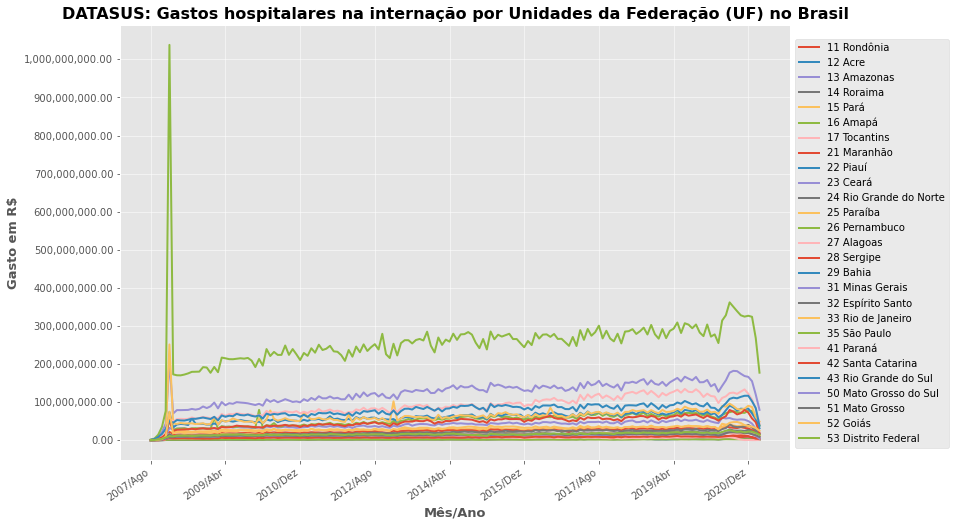

In [224]:
ax = validas.T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,0.98))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
plt.title('DATASUS: Gastos hospitalares na internação por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

***
### Desafio 2 - Aula 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência

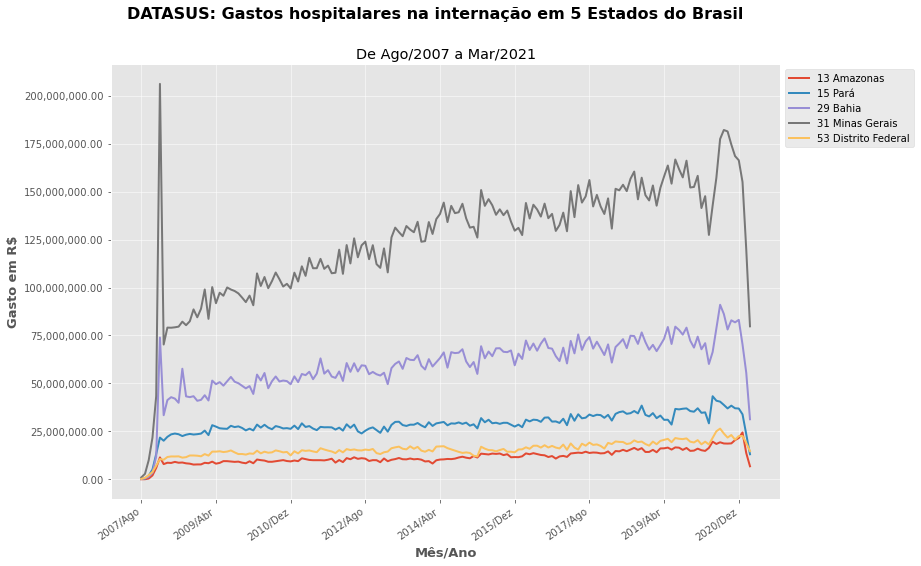

In [219]:
ax = validas.loc[['13 Amazonas', '15 Pará', '29 Bahia', '31 Minas Gerais', '53 Distrito Federal']].T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,1))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=11)
plt.suptitle('DATASUS: Gastos hospitalares na internação em 5 Estados do Brasil', weight=(700), fontsize=16)
plt.title('De Ago/2007 a Mar/2021')
plt.show()